In [156]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 
# Za prikaz grafov neposredno v Jupyter Notebook

1. KONSTRUKCIJA GRAFA

Generiranje grafa

In [157]:
#generiranje grafa
def generate_5_0_graph(k):
    """
    Ustvari graf tipa (5,0) s k-orbitami.
    Vsaka orbita vsebuje 10 oglišč, graf pa vključuje cilindrični del in petkotne zaključke.
    """
    G = nx.Graph()  # Ustvari prazen graf
    n = 10 * k  # Skupno število oglišč

    # Dodaj vsa oglišča
    for i in range(n):
        G.add_node(i)

    # Dodaj povezave za cilindrični del
    for orbit in range(k):
        base = orbit * 10
        for i in range(10):
            # Poveži oglišča v obroču (šestkotna struktura)
            G.add_edge(base + i, base + (i + 1) % 10)

            # Poveži z naslednjo orbito
            if orbit < k - 1:
                G.add_edge(base + i, base + 10 + (i + 1) % 10)

    # Dodaj petkotne zaključke
    # Prvih 5 oglišč prve orbite poveži v petkotnik
    for i in range(5):
        G.add_edge(i, (i + 1) % 5)

    # Zadnjih 5 oglišč zadnje orbite poveži v petkotnik
    for i in range(5):
        G.add_edge(n - 5 + i, n - 5 + (i + 1) % 5)

    return G

Risanje grafa

In [158]:
#Risanje grafa
def plot_graph(G, title="Graf"):
    """
    Nariši graf z uporabo matplotlib in knjižnice networkx.
    """
    pos = nx.spring_layout(G)  # Razporeditev vozlišč za boljšo vizualizacijo
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
    plt.title(title)
    plt.show()

Generiranje in risanje grafov za k = 3 in k = 4

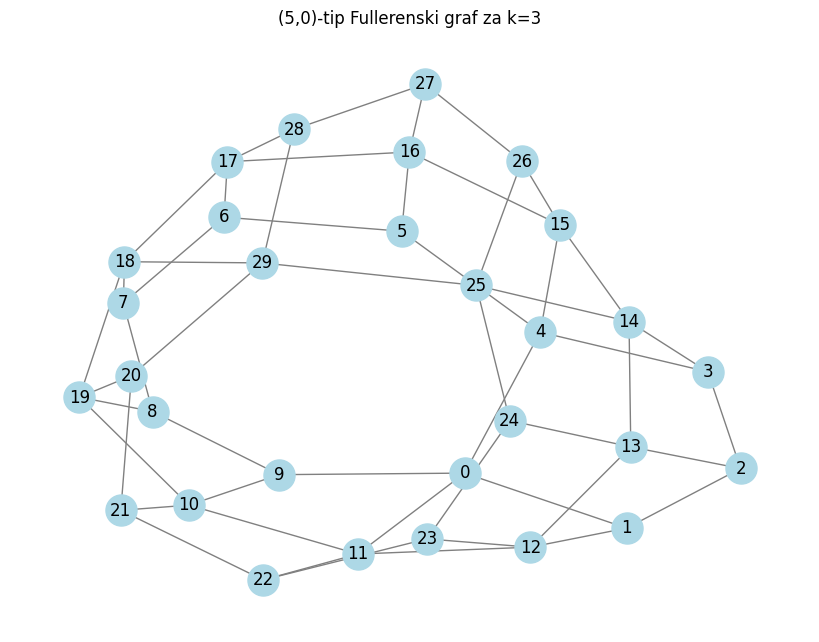

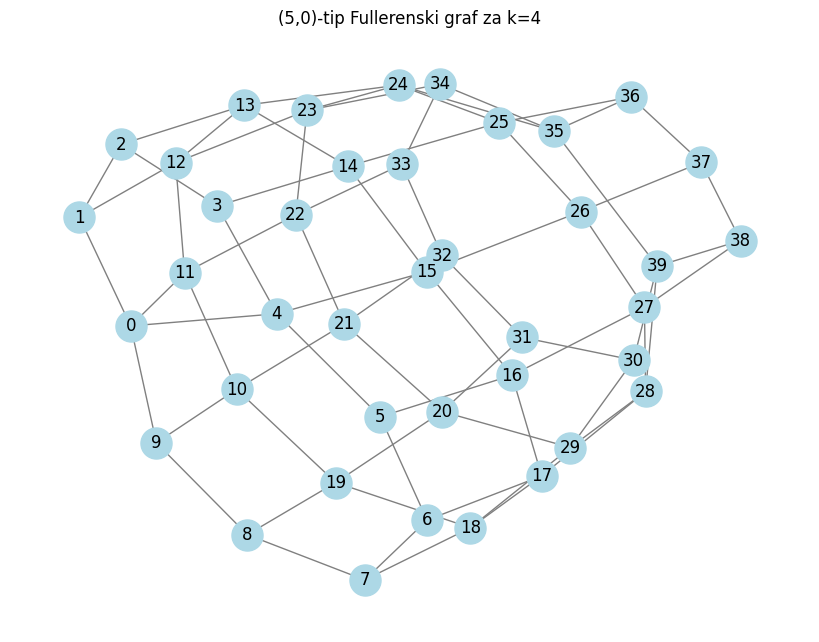

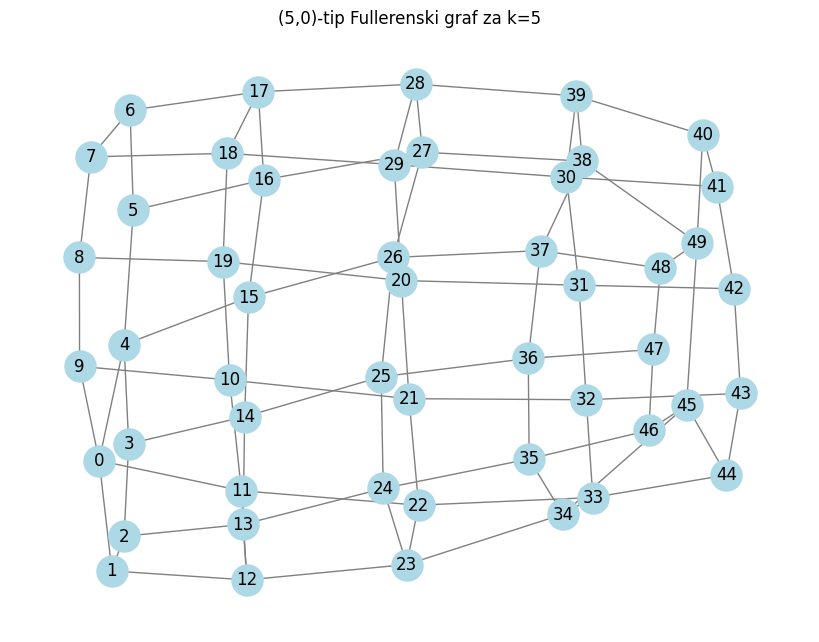

In [159]:
# Ustvari in nariši grafe za različne vrednosti k
k_vrednosti = [3, 4, 5]  # Določi število orbit
for k in k_vrednosti:
    G = generate_5_0_graph(k)  # Ustvari graf za dano k
    plot_graph(G, title=f"(5,0)-tip Fullerenski graf za k={k}")  # Nariši graf

Preverjanje kode

In [160]:
# Preverjanje osnovnih lastnosti grafa
print(f"Število oglišč: {G.number_of_nodes()}")
print(f"Število povezav: {G.number_of_edges()}")
print(f"Ali je graf povezan? {nx.is_connected(G)}")

Število oglišč: 50
Število povezav: 92
Ali je graf povezan? True


In [161]:
# Preveri krožno strukturo v vsaki orbiti
k = 3  # Vrednost k, ki si jo želiš preveriti
for orbit in range(k):
    base = orbit * 10
    print(f"Orbita {orbit}: Oglišča {list(range(base, base + 10))}")
    # Preveri krožne povezave
    for i in range(10):
        u, v = base + i, base + (i + 1) % 10
        if not G.has_edge(u, v):
            print(f"Povezava manjkajoča: {u}-{v}")

Orbita 0: Oglišča [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Orbita 1: Oglišča [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Orbita 2: Oglišča [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


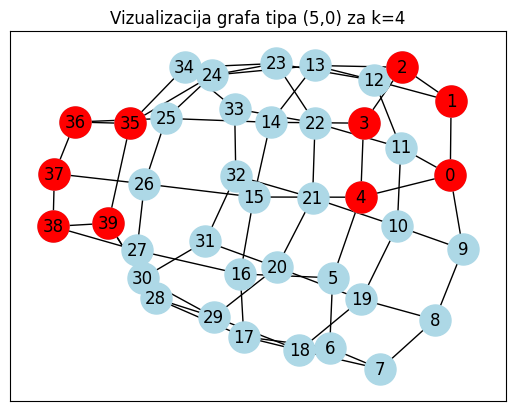

In [162]:
def draw_colored_graph(G, k):
    """
    Nariše graf z označenimi začetnimi in končnimi vozlišči v rdeči barvi.
    """
    pos = nx.spring_layout(G)  # Postavitev grafa
    
    # Vsa vozlišča pobarvamo modro
    nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500)
    nx.draw_networkx_edges(G, pos, edge_color="black")
    nx.draw_networkx_labels(G, pos, font_color="black")
    
    # Pobarvamo začetna vozlišča (prvi petkotnik) v rdečo
    first_pentagon = list(range(5))
    nx.draw_networkx_nodes(G, pos, nodelist=first_pentagon, node_color="red", node_size=500)
    
    # Pobarvamo končna vozlišča (zadnji petkotnik) v rdečo
    last_pentagon = list(range(10 * k - 5, 10 * k))
    nx.draw_networkx_nodes(G, pos, nodelist=last_pentagon, node_color="red", node_size=500)
    
    plt.title(f"Vizualizacija grafa tipa (5,0) za k={k}")
    plt.show()

# Testiraj s k=4
k = 4
G = generate_5_0_graph(k)
draw_colored_graph(G, k)

2. IZRAČUN RAZDALJ

In [163]:

def izračunaj_vektorje_razdalj(G):
    """
    Izračunaj vektorje razdalj za vsa vozlišča v grafu.

    Parametri:
    G (nx.Graph): Vhodni graf.

    Vrne:
    dict: Slovar, kjer so ključi vozlišča, vrednosti pa vektorji razdalj.
    """
    vektorji_razdalj = {}

    for vozlišče in G.nodes():
        razdalje = nx.single_source_shortest_path_length(G, vozlišče)
        max_razdalja = max(razdalje.values())
        vektor = [0] * (max_razdalja + 1)
        for razdalja in razdalje.values():
            vektor[razdalja] += 1
        vektorji_razdalj[vozlišče] = vektor

    return vektorji_razdalj

In [164]:

def preveri_enake_vektorje_razdalj(vektorji_razdalj):
    """
    Preveri, ali imajo vsi vektorji razdalj v grafu enake vrednosti.

    Parametri:
    vektorji_razdalj (dict): Vektorji razdalj za vsa vozlišča.

    Vrne:
    bool: True, če so vsi vektorji razdalj enaki, sicer False.
    """
    vektorji = list(vektorji_razdalj.values())
    return all(v == vektorji[0] for v in vektorji)

GRAFI

Vektorji razdalj za vzorčna vozlišča:
Vozlišče 0: [1, 4, 8, 10, 10, 9, 6, 2]
Vozlišče 1: [1, 3, 6, 8, 10, 10, 8, 4]
Vozlišče 2: [1, 3, 5, 7, 9, 9, 8, 5, 3]
Vozlišče 3: [1, 3, 6, 8, 10, 9, 7, 4, 2]
Vozlišče 4: [1, 4, 8, 10, 10, 9, 6, 2]
Vozlišče 5: [1, 3, 6, 10, 10, 10, 8, 2]
Vozlišče 6: [1, 3, 5, 8, 10, 9, 8, 6]
Vozlišče 7: [1, 3, 5, 7, 9, 9, 7, 6, 3]
Vozlišče 8: [1, 3, 5, 8, 10, 9, 7, 5, 2]
Vozlišče 9: [1, 3, 6, 10, 10, 9, 7, 4]
Vsi vektorji razdalj so enaki: False


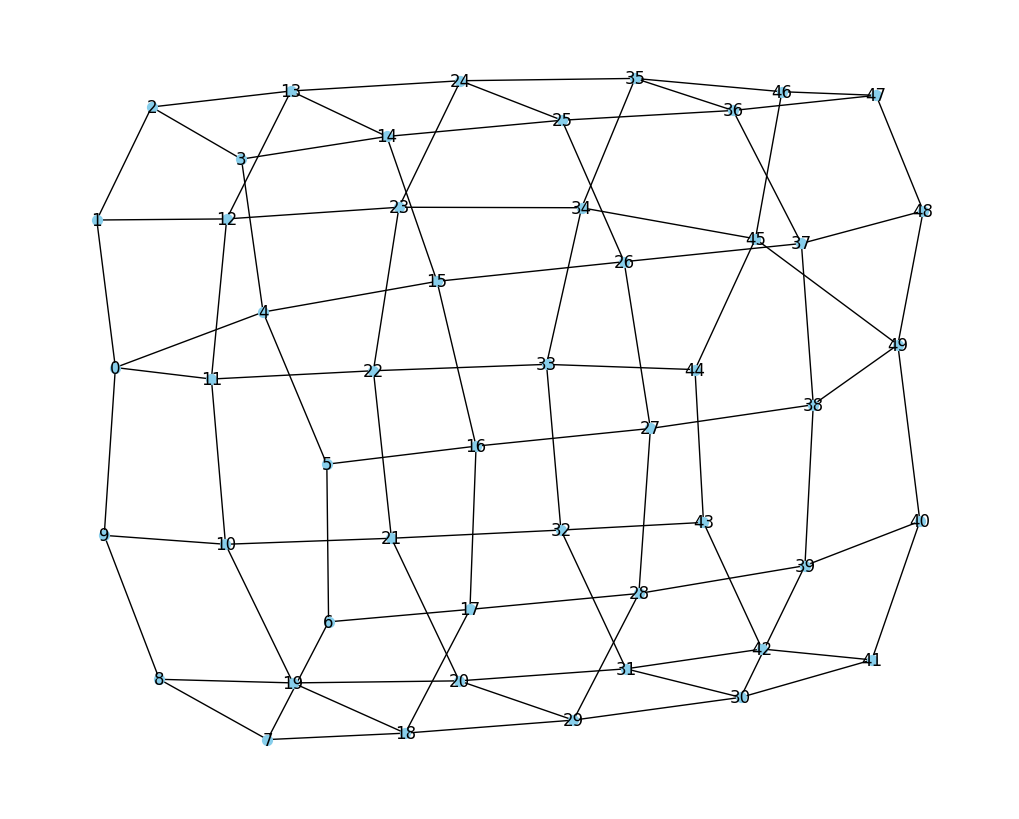

In [168]:
# Parametri
k = 5

G = generate_5_0_graph(k)

# Izračunaj vektorje razdalj
vektorji_razdalj = izračunaj_vektorje_razdalj(G)

# Preveri enake vektorje razdalj
vektorji_enaki = preveri_enake_vektorje_razdalj(vektorji_razdalj)

# Prikaži rezultate
print("Vektorji razdalj za vzorčna vozlišča:")
for vozlišče, vektor in list(vektorji_razdalj.items())[:10]:
    print(f"Vozlišče {vozlišče}: {vektor}")

print(f"Vsi vektorji razdalj so enaki: {vektorji_enaki}")

# Vizualiziraj graf
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=50, node_color="skyblue")
plt.show()

Vektorji razdalj za vzorčna vozlišča:
Vozlišče 0: [1, 22, 27]
Vozlišče 1: [1, 22, 27]
Vozlišče 10: [1, 22, 27]
Vozlišče 2: [1, 22, 27]
Vozlišče 11: [1, 22, 27]
Vozlišče 3: [1, 22, 27]
Vozlišče 12: [1, 22, 27]
Vozlišče 4: [1, 22, 27]
Vozlišče 13: [1, 22, 27]
Vozlišče 5: [1, 22, 27]
Vsi vektorji razdalj so enaki: True


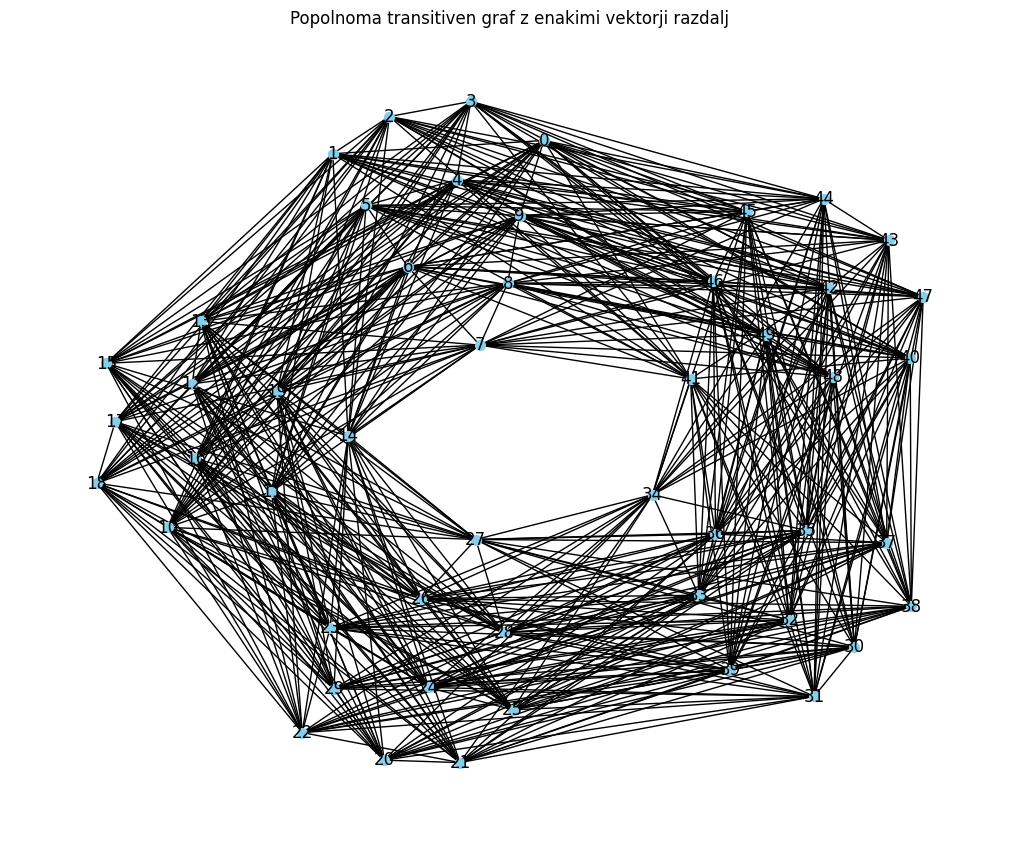

In [166]:
def ustvari_popolnoma_transitiven_graf(k):
    """
    Ustvari popolnoma transitive graf, kjer imajo vsa vozlišča enake vektorje razdalj.

    Parametri:
    k (int): Število slojev strukture grafa.

    Vrne:
    nx.Graph: Graf, kjer imajo vsa vozlišča enake vektorje razdalj.
    """
    G = nx.Graph()

    # Ustvari k slojev vozlišč
    for sloj in range(k):
        for i in range(10):
            trenutno_vozlišče = sloj * 10 + i
            G.add_node(trenutno_vozlišče)

            # Poveži vozlišča krožno znotraj istega sloja
            G.add_edge(trenutno_vozlišče, sloj * 10 + (i + 1) % 10)

            # Poveži vozlišča z ustreznimi položaji v naslednjem sloju
            if sloj < k - 1:
                G.add_edge(trenutno_vozlišče, (sloj + 1) * 10 + i)

    # Dodaj povezave med vsemi vozlišči v sosednjih slojih za popolno transitivnost
    for sloj in range(k - 1):
        for i in range(10):
            for j in range(10):
                G.add_edge(sloj * 10 + i, (sloj + 1) * 10 + j)

    # Zapri strukturo tako, da povežeš zadnji sloj s prvim
    for i in range(10):
        for j in range(10):
            G.add_edge(i, (k - 1) * 10 + j)

    return G



# Parametri
k = 5

# Ustvari popolnoma transitiven graf
G = ustvari_popolnoma_transitiven_graf(k)

# Izračunaj vektorje razdalj
vektorji_razdalj = izračunaj_vektorje_razdalj(G)

# Preveri enake vektorje razdalj
vektorji_enaki = preveri_enake_vektorje_razdalj(vektorji_razdalj)

# Prikaži rezultate
print("Vektorji razdalj za vzorčna vozlišča:")
for vozlišče, vektor in list(vektorji_razdalj.items())[:10]:
    print(f"Vozlišče {vozlišče}: {vektor}")

print(f"Vsi vektorji razdalj so enaki: {vektorji_enaki}")

# Vizualiziraj graf
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=50, node_color="skyblue")
plt.title("Popolnoma transitiven graf z enakimi vektorji razdalj")
plt.show()

Vektorji razdalj za vzorčna vozlišča:
Vozlišče 0: [1, 4, 8, 12, 16, 9]
Vozlišče 1: [1, 4, 8, 12, 16, 9]
Vozlišče 12: [1, 4, 8, 12, 16, 9]
Vozlišče 2: [1, 4, 8, 12, 16, 9]
Vozlišče 13: [1, 4, 8, 12, 16, 9]
Vozlišče 3: [1, 4, 8, 12, 16, 9]
Vozlišče 14: [1, 4, 8, 12, 16, 9]
Vozlišče 4: [1, 4, 8, 12, 16, 9]
Vozlišče 15: [1, 4, 8, 12, 16, 9]
Vozlišče 5: [1, 4, 8, 12, 16, 9]
Vsi vektorji razdalj so enaki: True


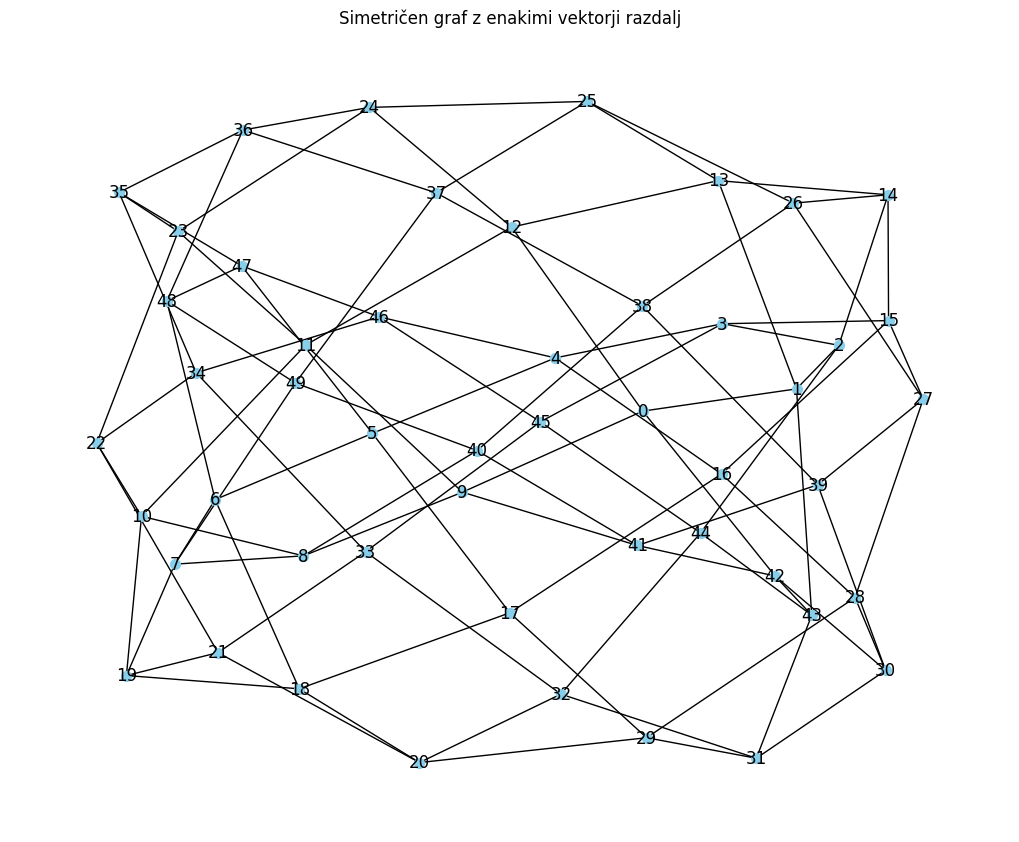

In [167]:
def ustvari_simetričen_graf(k):
    """
    Ustvari simetričen graf z rotacijsko simetrijo, kjer imajo vsa vozlišča enake vektorje razdalj.

    Parametri:
    k (int): Število slojev strukture grafa.

    Vrne:
    nx.Graph: Graf, kjer imajo vsa vozlišča enake vektorje razdalj.
    """
    G = nx.Graph()

    # Ustvari k slojev vozlišč
    for sloj in range(k):
        for i in range(10):
            trenutno_vozlišče = sloj * 10 + i
            G.add_node(trenutno_vozlišče)

            # Poveži vozlišča krožno znotraj istega sloja
            G.add_edge(trenutno_vozlišče, sloj * 10 + (i + 1) % 10)

            # Poveži vozlišča z rotacijsko simetrijo med sosednjimi sloji
            if sloj < k - 1:
                G.add_edge(trenutno_vozlišče, (sloj + 1) * 10 + (i + 2) % 10)

    # Zapri strukturo tako, da povežeš zadnji sloj s prvim z rotacijsko simetrijo
    for i in range(10):
        G.add_edge(i, (k - 1) * 10 + (i + 2) % 10)

    return G

# Parametri
k = 5

# Ustvari simetričen graf
G = ustvari_simetričen_graf(k)

# Izračunaj vektorje razdalj
vektorji_razdalj = izračunaj_vektorje_razdalj(G)

# Preveri enake vektorje razdalj
vektorji_enaki = preveri_enake_vektorje_razdalj(vektorji_razdalj)

# Prikaži rezultate
print("Vektorji razdalj za vzorčna vozlišča:")
for vozlišče, vektor in list(vektorji_razdalj.items())[:10]:
    print(f"Vozlišče {vozlišče}: {vektor}")

print(f"Vsi vektorji razdalj so enaki: {vektorji_enaki}")

# Vizualiziraj graf
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=50, node_color="skyblue")
plt.title("Simetričen graf z enakimi vektorji razdalj")
plt.show()